In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

# Load the Data
data = pd.read_csv("german_credit_data.csv",index_col=0) # Viết tắt của data - frame

In [9]:
data.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
data.info() # 1000 điểm dữ liệu là ít - mô hình khó chính xác - Thu thập nhiều dữ liệu hơn


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
data.describe()


,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Number of Numerical Variable:  4


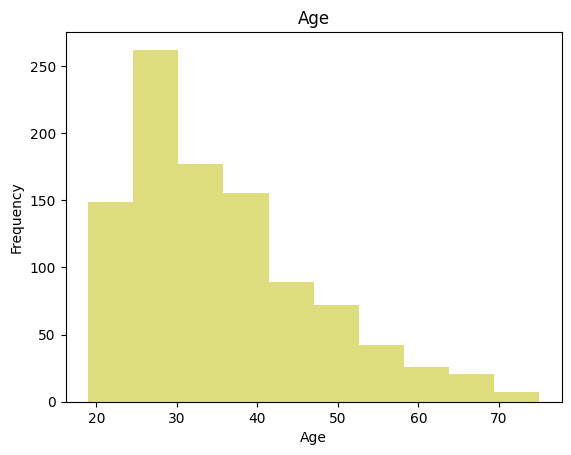

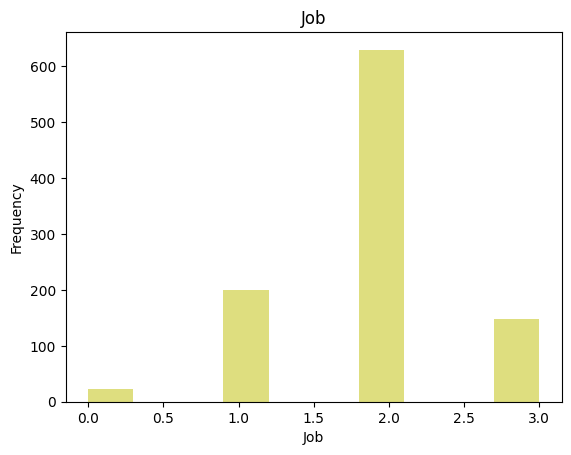

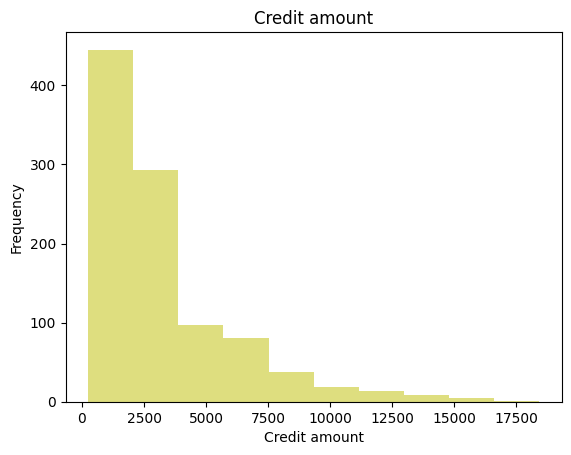

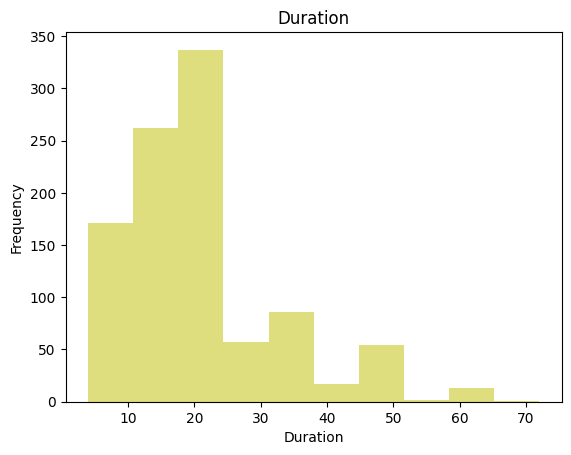

4 variables have been plotted


In [5]:
num_cols = [col for col in data.columns if data[col].dtypes != 'O' and col not in "Id"]
print('Number of Numerical Variable: ', len(num_cols))


def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].plot.hist(alpha=0.5, color='y')
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


hist_for_nums(data, num_cols)

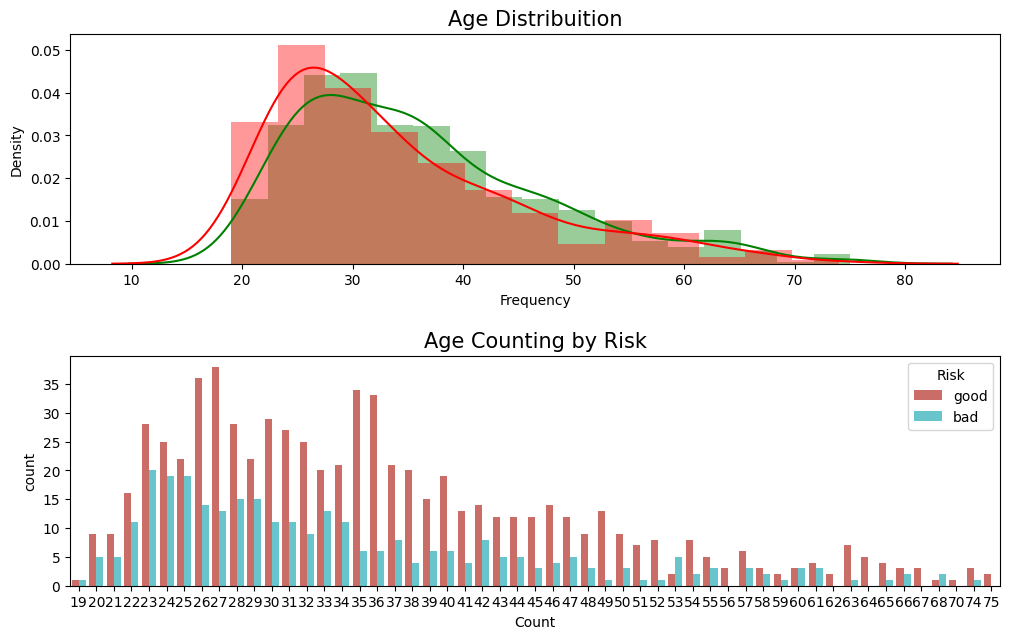

In [6]:
data_good = data[data["Risk"] == 'good']
data_bad = data[data["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(data_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(data_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=data, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

In [7]:
fig = px.histogram(data, x='Risk', color='Risk', title='Credit Risk Distribution')
fig.update_layout(xaxis_title='Credit Risk', yaxis_title='Count')
fig.show()

In [8]:
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

def visualize_categorical_columns(data, col_list, hue='Risk'):
    for col in col_list:
        fig = px.histogram(data, x=col, color=hue, title=f'{col} Distribution by Credit Risk')
        fig.show()

visualize_categorical_columns(data, categorical_columns)